## Requirements

In [164]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.5)
import re

combine_data = pd.read_csv("./combine_csvs/all_combines.csv")
combine_data.head()
combine_data.columns

Index(['Rk', 'Year', 'Player', 'Pos', 'AV', 'School', 'College', 'Height',
       'Wt', '40YD', 'Vertical', 'BenchReps', 'Broad Jump', '3Cone', 'Shuttle',
       'Drafted (tm/rnd/yr)'],
      dtype='object')

## Introduction

The NFL is a multi-billion dollar organization that plays in front of tens of thousands of fans live and millions across the United States and extends across the globe. Each year the NFL holds the NFL draft where each team is allotted an equal number of picks which it then uses to pick talented players coming out of college. These players are given the opportunity to participate in the NFL combine where they are put through a number of drills to help scouts assess their draft stock. 

At the NFL Combine, players are put through a number of drills to assess their physical attributes. The drills include the 40-yard dash, bench press, vertical jump, broad jump, 3-cone drill and the shuttle run. 

- The 40-yard dash is used to assess participants' speed and consists of timing the participant's time to sprint across 40 yards.

- The bench press is used to assess participants' strength and consists of measuring how many consecutive repititions each participant can complete of 225 pounds.

- The broad jump is used to assess participants' lower body strength and explosion. The participant begins at a stand still and then jumps out as far as they can and still land on their feet. The distance that they covered is then measured.

- The 3-cone drill is used to assess participants' agility. A set of 3-cones are set up in an l-shape and the participant runs through the set of 3-cones in a tight fashion. This drill is to assess acceleration and change of direction of the participant. 

- The shuttle run is used to assess participants' explosion and acceleration. The participant begins by first sprinting five yards to the left, then turn around sprint ten yards to the right, turn around once more and finish sprinting the last five yards to the left. 

All of these drills combined are used to assess the physical attributes of the participants. The following project will attempt to make predictions on where participants should be drafted according to their performance in these drills.

## Visualizing the Data

Before beginning a data analysis, we will contextualize these combine measurements with respect to the players that being tested. Certain positions will require excellence in certain abilities. While a defensive end may place a higher priority on their strength, it may not be realistic to expect a wide receiver or a punter to do the same.

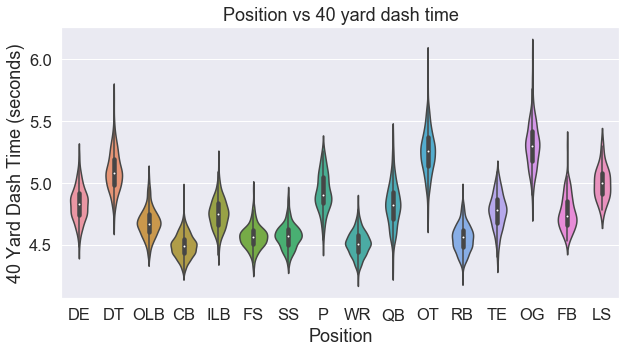

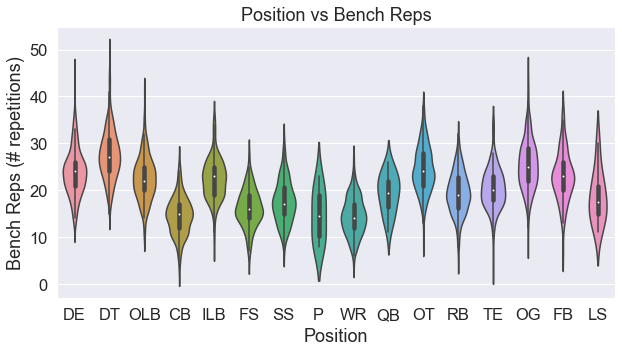

In [173]:
plt.figure(figsize=(10, 5))
yd_plot = sns.violinplot(x=combine_data['Pos'], y=combine_data['40YD'])
yd_plot.set_title("Position vs 40 yard dash time")
yd_plot.set_ylabel("40 Yard Dash Time (seconds)")
yd_plot.set_xlabel("Position")
plt.show()

plt.figure(figsize=(10, 5))
bench_plot = sns.violinplot(x=combine_data['Pos'], y=combine_data['BenchReps'])
bench_plot.set_title("Position vs Bench Reps")
bench_plot.set_ylabel("Bench Reps (# repetitions)")
bench_plot.set_xlabel("Position")
plt.show()

## Cleaning the Data

For the sake of this analysis, we will only take into account measurements pertinent to the combine. Information such as school, team the player was drafted by, and approximate value (measurement of a player's value over the course of a season) will be removed. 

As players will commonly not participate in all drills, it is important to consider what to do with NaN values. For this analysis, we decided to impute average measurements by position. It is expected that players of similar positions will yield similar results across drills. For drills that yield low magnitude but high variance values, such as the bench press, this method may cause further issues. However, we decided this would be the best solution going forward.

In [119]:
combine_data = pd.read_csv("./combine_csvs/all_combines.csv")

In [103]:
combine_data.head()

,Rk,Year,Player,Pos,AV,School,College,Height,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle,Drafted (tm/rnd/yr)
0,1,2000,Brian Young\YounBr20,DE,47.0,Texas-El Paso,College Stats,6-2,278,4.94,29.5,27.0,106.0,7.20,4.47,St. Louis Rams / 5th / 139th pick / 2000
1,2,2000,Cedric Woodard\WoodCe20,DT,15.0,Texas,NaN,6-2,290,5.21,30.5,23.0,109.0,NaN,NaN,Baltimore Ravens / 6th / 191st pick / 2000
2,3,2000,Antonio Wilson\WilsAn20,OLB,2.0,Texas A&M-Commerce,NaN,6-2,245,4.56,NaN,11.0,NaN,NaN,NaN,Minnesota Vikings / 4th / 106th pick / 2000
3,4,2000,Josh Williams\WillJo30,DT,19.0,Michigan,NaN,6-3,282,4.90,30.5,NaN,111.0,7.22,4.25,Indianapolis Colts / 4th / 122nd pick / 2000
4,5,2000,Damen Wheeler\WheeDa20,CB,0.0,Colorado,NaN,5-9,179,4.51,35.0,11.0,115.0,7.21,4.27,San Diego Chargers / 6th / 203rd pick / 2000


In [104]:
combine_data.drop(['AV', 'School', 'College'], axis=1, inplace=True)
combine_data.head()

combine_data['Height'] = combine_data['Height'].apply(lambda x: int(x[0:1]) * 12 + int(x[2:3]))
combine_data.dropna(subset=['Drafted (tm/rnd/yr)'], inplace=True)
player_cols = combine_data['Player'].str.split("\\", expand=True)
combine_data['Player'] = player_cols[0]

draft_cols = combine_data['Drafted (tm/rnd/yr)'].str.split(" / ", expand=True)
combine_data['Pick Number'] = draft_cols[2]
combine_data['Pick Number'] = combine_data['Pick Number'].apply(lambda x: re.findall(r'-?\d+\.?\d*', x)[0])
combine_data.drop(['Drafted (tm/rnd/yr)'], axis=1, inplace=True)

combine_data.head()

,Rk,Year,Player,Pos,Height,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle,Pick Number
0,1,2000,Brian Young,DE,74,278,4.94,29.5,27.0,106.0,7.20,4.47,139
1,2,2000,Cedric Woodard,DT,74,290,5.21,30.5,23.0,109.0,NaN,NaN,191
2,3,2000,Antonio Wilson,OLB,74,245,4.56,NaN,11.0,NaN,NaN,NaN,106
3,4,2000,Josh Williams,DT,75,282,4.90,30.5,NaN,111.0,7.22,4.25,122
4,5,2000,Damen Wheeler,CB,69,179,4.51,35.0,11.0,115.0,7.21,4.27,203


In [107]:
grouped = combine_data.groupby(['Pos']).mean()

combine_data['Wt'] = combine_data.apply(lambda row: grouped.loc[row['Pos']]['Wt'] if row['Wt'] != row['Wt'] else row['Wt'], axis=1)
combine_data['40YD'] = combine_data.apply(lambda row: grouped.loc[row['Pos']]['40YD'] if row['40YD'] != row['40YD'] else row['40YD'], axis=1)
combine_data['Vertical'] = combine_data.apply(lambda row: grouped.loc[row['Pos']]['Vertical'] if row['Vertical'] != row['Vertical'] else row['Vertical'], axis=1)
combine_data['BenchReps'] = combine_data.apply(lambda row: grouped.loc[row['Pos']]['BenchReps'] if row['BenchReps'] != row['BenchReps'] else row['BenchReps'], axis=1)
combine_data['Broad Jump'] = combine_data.apply(lambda row: grouped.loc[row['Pos']]['Broad Jump'] if row['Broad Jump'] != row['Broad Jump'] else row['Broad Jump'], axis=1)
combine_data['3Cone'] = combine_data.apply(lambda row: grouped.loc[row['Pos']]['3Cone'] if row['3Cone'] != row['3Cone'] else row['3Cone'], axis=1)
combine_data['Shuttle'] = combine_data.apply(lambda row: grouped.loc[row['Pos']]['Shuttle'] if row['Shuttle'] != row['Shuttle'] else row['Shuttle'], axis=1)
combine_data['Pick Number'] = combine_data['Pick Number'].astype(int)

combine_data.head()
#for index, row in combine_data:
 #   print(index)
 #   print(row)

,Rk,Year,Player,Pos,Height,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle,Pick Number
0,1,2000,Brian Young,DE,74,278,4.94,29.500000,27.000000,106.000000,7.200000,4.470000,139
1,2,2000,Cedric Woodard,DT,74,290,5.21,30.500000,23.000000,109.000000,7.683614,4.620049,191
2,3,2000,Antonio Wilson,OLB,74,245,4.56,34.912955,11.000000,118.320158,7.106825,4.272837,106
3,4,2000,Josh Williams,DT,75,282,4.90,30.500000,28.104603,111.000000,7.220000,4.250000,122
4,5,2000,Damen Wheeler,CB,69,179,4.51,35.000000,11.000000,115.000000,7.210000,4.270000,203


## Creating a model

At this point, all of our data is properly formatted and can be used for a predictive model. The goal of this model is to predict a player's draft stock given their combine measurements.

## Discussion

The combine measurements have little significance in determining a player's draft stock. While the combine does an effective job of measuring player's physical attributes, it is difficult to determine from this data exactly the skills that players possess. Football is a game of not only physicality but also skill. Certain skills are difficult to measure with only quantitative measurements. It is great to know how tall or fast a player is, but numbers can only so accurately measure an inidividual's blocking, passing, catching, kicking, etc. The list goes on. 